In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense

In [2]:
news1 = pd.read_csv('./djia_news/djia_news copy.csv')
news2 = pd.read_csv('./nasdaq/nasdaq.csv')
# news1 =  news1.replace([0,1,2], ['decrease', 'increase', 'constant'])

combined_news = news1.append(news2)
combined_news = combined_news[['Label', 'Headline']]
combined_news = combined_news.replace([0,1,2], ['decrease', 'increase', 'constant'])

# Seperating training and testing data

In [3]:
train_limit = round(len(news1) * 0.75)

train_data = news1[0:train_limit]
test_data = news1[train_limit:]

In [4]:
train_headlines = train_data['Headline']
train_labels = train_data["Label"]

test_headlines = test_data['Headline']
test_labels = test_data['Label']

print(len(train_headlines), len(train_labels))

1786 1786


In [5]:
vocab_size = 10000
emb_size = 50
max_length = 20000
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<oov>'

In [6]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(train_headlines)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_headlines)
train_padded = pad_sequences(train_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_headlines)
test_padded = pad_sequences(test_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

In [9]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(train_labels)

train_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
test_label_seq = np.array(label_tokenizer.texts_to_sequences(test_labels))
train_length = len(train_label_seq)
test_length = len(test_label_seq)

for i in range(0, train_length):
    train_label_seq[i]  = train_label_seq[i] - 1
for i in range(0, test_length):
    test_label_seq[i]  = test_label_seq[i] - 1
# print(train_label_seq[0])
# print(train_label_seq[1])
# print(train_label_seq[690])
# print(train_label_seq.shape)

AttributeError: 'int' object has no attribute 'lower'

# Model Construction

In [7]:
model = Sequential()
model.add(Embedding(vocab_size, emb_size, input_length = max_length))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20000, 50)         500000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                21248     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 525,603
Trainable params: 525,603
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10
history = model.fit(
    train_padded,
    train_labels,
    batch_size = 128,
    epochs = num_epochs,
    validation_data = (test_padded, test_labels),
)

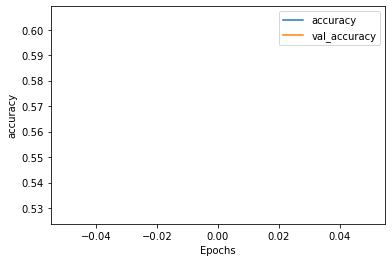

In [27]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [2]:
import pickle
from keras_pickle_wrapper import KerasPickleWrapper

pickled_wrapped = KerasPickleWrapper(model)
filename = 'model_weight.pkl'
pickle.dump(model, open(filename, 'wb'))

NameError: name 'model' is not defined